# Programmazione Euristica: il percorso del Cavallo.

https://it.wikipedia.org/wiki/Percorso_del_cavallo

Il percorso del cavallo è un problema matematico riguardante lo spostarsi di un cavallo su una scacchiera. Il cavallo è posizionato sulla scacchiera vuota e, spostandosi secondo le regole degli scacchi, deve occupare ogni casa esattamente una volta.<br>

https://it.wikipedia.org/wiki/Cavallo_(scacchi)
 Il movimento del cavallo può essere immaginato come la somma di uno spostamento orizzontale di una casa e di uno verticale di due o viceversa, descrivendo una "L". Il cavallo è inoltre l'unico pezzo che, nei suoi movimenti, può attraversare anche caselle già occupate da altri pezzi: si dice che può "saltare". Si noti che a ogni mossa il cavallo cambia il colore della casa in cui si trova.<br>

Dobbiamo scrivere uno script che muova il cavallo sulla scacchiera, rappresentata da un vettore 8x8, inizializzato a 0. Se posizionato al centro, il cavallo potra muoversi in 8 possibili caselle che possiamo numerare da 1 a 8 seguendo il senso orario dal :
![image info](../assets/cavallo.jpg)

Descriviamo le possibili mosse del cavallo su una tupla (h - orizzontale, v - verticale) contente l'incremento lungo gli assi h e v: ad esempio, facendo riferimento alla foto sopra, dala posizione in cui si trova il cavallo (h=3,v=4), per spostarsi nella posizione 1, in (h=5, v=3), faremo riferimento alla tupla (+2,-1) (due a destra, una in su).


In [4]:
# Rappresentiamo la Scacchiera come un array bidimensionale 8x8 chimato `board`:
# Importiamo le librerie standard di python che ci serviranno in questo progetto:
import random
import collections

# Le librerie dei framework specifici:
import matplotlib.pyplot as plt # Motore grafico di python per realizzare diagrammi e fuznoni
import numpy as np # Libreria che gestisce ad altissima efficienza gli array
import seaborn as sns # Libreria che usa il motore grafico di MatplotLib con funzionalita' grafiche avanzate

Rappresentiamo la scacchiera con un array bidimensionale 8x8 riempito di Zeri. Il cavallo si muove nella scacchiera partendo da una casella che verra' marcata col numero 1. Teniamo traccia degli spostamenti del cavallo incrementando di 1 ogni passaggio, ottenendo dunque un array di questo tipo:
```
array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  8.,  0.,  2., 17.,  0.,  0.],
       [ 7.,  0.,  5.,  0.,  0.,  0., 13.,  0.],
       [ 0.,  9.,  0.,  1., 18., 11., 16.,  0.],
       [ 0.,  6.,  0., 10.,  0., 14.,  0., 12.],
       [ 0.,  0.,  0.,  0.,  0., 19.,  0., 15.]])
```
Da questo array si possono vedere tutti i salti che ha fatto il cavallo ha fatto 19 salti (sui 64 possibili) prima di non riuscire piu' a muoversi su caselle mai toccate.


In [33]:
# Scriviamo una funzione che inizializzi il gioco, creando una "board" e posizionando il cavallo nella sua posizione iniziale.
# Consideriamo la possibilita' di far partire il cavallo da una delle sue posizioni "standard"
# o da una posizione casuale nella scacchiera:


def initialize_game(horse_default_position=True):
    """
    Inizializza una partita di scacchi posizionando un cavallo su una scacchiera 8x8.

    Parametri:
    horse_default_position (bool): Se True, il cavallo viene posizionato in una delle quattro posizioni predefinite.
                                  Se False (non implementato), il cavallo può essere posizionato in una posizione casuale.

    Output:
    board (numpy.ndarray): Una matrice 8x8 che rappresenta la scacchiera, con 1 nella posizione del cavallo e 0 altrove.
    
    TODO: Implementare la possibilità di definire una posizione casuale per il cavallo.
    """

    # Inizializza una scacchiera 8x8 con tutti zeri
    board = np.zeros((8,8))
    
    # Definisce le possibili posizioni iniziali del cavallo
    positions = [(0,1), (0,6), (7,1), (7,6)]
    
    # Sceglie casualmente una delle posizioni iniziali per il cavallo
    start_position = random.choice(positions)

    # Posizioniamo il cavallo nella sua posizione iniziale
    board[start_position] = 1

    # print(board)  # Opzione per stampare la scacchiera (attualmente commentata)

    return board  # Ritorna la scacchiera con il cavallo posizionato

    


# Scrviamo una funzione che legge una board e restituisce:
# - il numero di mosse raggunto dal cavallo
# - una tupla con la posizione attuale, orizzontale e verticale
def get_horse_current_position(board):
    """
    Ottiene la posizione corrente del cavallo sulla scacchiera.

    Parametri:
    board (numpy.ndarray): Una matrice 8x8 che rappresenta la scacchiera, con i numeri che indicano le mosse del cavallo.

    Output:
    current_move_number (int): Il numero dell'ultima mossa eseguita dal cavallo.
    (current_h, current_v) (tuple): Una tupla che rappresenta la posizione corrente del cavallo sulla scacchiera, 
                                    dove current_h è l'indice della riga e current_v è l'indice della colonna.

    Descrizione:
    La funzione ricerca il valore massimo nella scacchiera, che rappresenta l'ultima mossa del cavallo, 
    e determina la posizione corrente del cavallo in termini di coordinate sulla scacchiera.
    """

    # Trova il numero dell'ultima mossa eseguita dal cavallo
    current_move_number = board.max()

    # Ottiene le coordinate (riga, colonna) della posizione corrente del cavallo
    current_h, current_v = np.unravel_index(board.argmax(), (8,8))

    return current_move_number, (current_h, current_v)


# Scriviamo una funzione che legge una board e restituisce una lista delle possibili mosse disponibili
def get_available_moves(board):
    """
    Determina le mosse disponibili per il cavallo sulla scacchiera.

    Parametri:
    board (numpy.ndarray): Una matrice 8x8 che rappresenta la scacchiera, con i numeri che indicano le mosse del cavallo.

    Output:
    available_moves (list): Una lista di tuple, dove ogni tupla rappresenta una possibile mossa (coordinate) che il cavallo può effettuare.

    Descrizione:
    La funzione calcola le mosse legali del cavallo a partire dalla sua posizione corrente. Prende in considerazione tutte le 
    possibili mosse di un cavallo in una partita di scacchi (movimenti in L) e verifica quali di queste sono all'interno 
    dei confini della scacchiera e su caselle non ancora visitate.
    """

    # Definisce i possibili movimenti di un cavallo in una scacchiera
    possible_movements = [(2,1), (2,-1), (-2,1), (-2,-1), (1,2), (1,-2), (-1,2), (-1,-2)]

    # Ottiene la posizione corrente del cavallo
    _, current_horse_position = get_horse_current_position(board)
    h_pos, v_pos = current_horse_position
    
    available_moves = []

    # Valuta ogni possibile mossa
    for move in possible_movements:
        h_move, v_move = move
        new_h_pos = h_pos + h_move
        new_v_pos = v_pos + v_move
        # Verifica se la mossa è all'interno della scacchiera e su una casella non visitata
        if 0 <= new_h_pos <= 7 and 0 <= new_v_pos <= 7 and board[(new_h_pos, new_v_pos)] == 0:
            available_moves.append((new_h_pos, new_v_pos))

    return available_moves



# Scriviamo una funzione che date le mosse a disposizione, ne sceglie casualmente una e la restituisce
def random_move(available_moves, euristical_choiche = True):
    """
    Sceglie una mossa casuale da una lista di mosse disponibili.

    Parametri:
    available_moves (list): Una lista di tuple, dove ogni tupla rappresenta una possibile mossa che il cavallo può effettuare.

    Output:
    (tuple): Una tupla che rappresenta la mossa scelta casualmente dalla lista delle mosse disponibili.

    Descrizione:
    La funzione seleziona in modo casuale una delle mosse disponibili fornite nella lista. È utile per aggiungere 
    un elemento di casualità nel movimento del cavallo.
    """

    if euristical_choiche:
        euristical_board = 8-np.array([   [3, 5, 4, 4, 4, 4, 5, 2],
                                        [3, 4, 6, 6, 6, 6, 4, 3],
                                        [4, 6, 7, 7, 6, 7, 6, 4],
                                        [4, 6, 7, 6, 6, 7, 6, 4],
                                        [4, 5, 7, 6, 6, 6, 6, 4],
                                        [4, 5, 7, 6, 7, 7, 6, 5],
                                        [3, 4, 6, 6, 6, 6, 4, 4],
                                        [2, 5, 4, 4, 4, 4, 5, 2]])
        
        
        new_euristical_aveilable_moves = []

        for move in available_moves:
            for n in range(euristical_board[move]):
                new_euristical_aveilable_moves.append(move)

        # Sceglie casualmente una mossa dalla lista delle mosse disponibili

        return random.choice(new_euristical_aveilable_moves)
    
    return random.choice(available_moves)




In [ ]:
8-np.array([   [3, 5, 4, 4, 4, 4, 5, 2],
                                    [3, 4, 6, 6, 6, 6, 4, 3],
                                    [4, 6, 7, 7, 6, 7, 6, 4],
                                    [4, 6, 7, 6, 6, 7, 6, 4],
                                    [4, 5, 7, 6, 6, 6, 6, 4],
                                    [4, 5, 7, 6, 7, 7, 6, 5],
                                    [3, 4, 6, 6, 6, 6, 4, 4],
                                    [2, 5, 4, 4, 4, 4, 5, 2]])

array([[5, 3, 4, 4, 4, 4, 3, 6],
       [5, 4, 2, 2, 2, 2, 4, 5],
       [4, 2, 1, 1, 2, 1, 2, 4],
       [4, 2, 1, 2, 2, 1, 2, 4],
       [4, 3, 1, 2, 2, 2, 2, 4],
       [4, 3, 1, 2, 1, 1, 2, 3],
       [5, 4, 2, 2, 2, 2, 4, 4],
       [6, 3, 4, 4, 4, 4, 3, 6]])

In [34]:


# Scriviamo una funzione che legge una board e fa fare al cavallo una mossa scegliendo tra le disponibili casualmente

def move_horse(board):
    """
    Effettua una mossa del cavallo sulla scacchiera.

    Parametri:
    board (numpy.ndarray): Una matrice 8x8 che rappresenta la scacchiera, con i numeri che indicano le mosse del cavallo.

    Output:
    board (numpy.ndarray): La scacchiera aggiornata dopo la mossa del cavallo.
    status (str): Una stringa che indica lo stato del gioco: "Game Over" se non ci sono più mosse disponibili, 
                  "Keep Playing" se il gioco può continuare.

    Descrizione:
    La funzione calcola la mossa successiva del cavallo basandosi sulla sua posizione corrente. Se non ci sono mosse 
    disponibili, il gioco termina. Altrimenti, effettua una mossa casuale tra quelle disponibili e aggiorna la scacchiera.
    """

    # Ottiene il numero dell'ultima mossa e calcola il numero per la prossima mossa
    current_move, _ = get_horse_current_position(board)
    next_move_count = current_move + 1

    # Ottiene le mosse disponibili per il cavallo
    available_moves = get_available_moves(board)
    if len(available_moves) == 0:
        return board, "Game Over"  # Se non ci sono mosse disponibili, il gioco termina

    # Sceglie una mossa casuale tra quelle disponibili e aggiorna la scacchiera
    next_move = random_move(available_moves)
    board[next_move] = next_move_count

    # print(board)  # Opzione per stampare la scacchiera (attualmente commentata)

    return board, "Keep Playing"  # Continua il gioco con la scacchiera aggiornata

# Scriviamo una funzione che gioca una partita completa sino a che il cavallo non puo' piu' muoversi
# A fine partita, se il parametro "verbose" e' impostato su true, stampa a video la board.
# Restituisce la board
def play_one_game(verbose=False, horse_default_start_position=True):
    """
    Gioca una partita completa di movimenti del cavallo sulla scacchiera.

    Parametri:
    verbose (bool): Se impostato su True, stampa la scacchiera dopo ogni mossa.
    horse_default_start_position (bool): Se True, il cavallo inizia da una posizione predefinita. 
                                         Se False, il cavallo inizia da una posizione casuale.

    Output:
    board (numpy.ndarray): La scacchiera alla fine del gioco.

    Descrizione:
    La funzione inizia una nuova partita posizionando il cavallo in una posizione iniziale (predefinita o casuale).
    Poi, esegue mosse del cavallo finché non ci sono più mosse disponibili (Game Over). Se `verbose` è impostato su True, 
    stampa la scacchiera dopo ogni mossa.
    """

    # Inizializza la scacchiera con il cavallo in posizione iniziale
    board = initialize_game(horse_default_start_position)
    
    # Effettua la prima mossa del cavallo
    board, status = move_horse(board)

    # Continua a muovere il cavallo finché ci sono mosse disponibili
    while status != "Game Over":
        board, status = move_horse(board)

    # Se verbose è True, stampa la scacchiera
    if verbose:
        print(board)

    return board  # Ritorna la scacchiera alla fine del gioco


# Scriviamo una funzione che gioca n partite e restituisce un po' di statistiche:
# - Numero partite vinte o miglior partita,
# - Board completate o miglior Board
# - Punteggio raggiunto in media e mediana,
# - Frequenza di occupazione di alcune caselle nella board
# - vvee
def play_multiple_games(n=100, verbose=False, horse_default_start_position=True, win_game=False):
    """
    Gioca più partite di scacchi per valutare le prestazioni del cavallo.

    Parametri:
    n (int): Numero di partite da giocare.
    verbose (bool): Se impostato su True, fornisce output aggiuntivi durante il gioco.
    horse_default_start_position (bool): Se True, il cavallo inizia da una posizione predefinita. 
                                         Se False, il cavallo inizia da una posizione casuale.
    win_game (bool): Se True, gioca fino a trovare una partita in cui il cavallo copre tutte le caselle.

    Output:
    board (numpy.ndarray): La scacchiera della migliore partita giocata (nel caso di win_game = True).
    (Statistiche non implementate nel TODO)

    Descrizione:
    La funzione gioca un numero definito di partite. Se `win_game` è True, continua a giocare finché non trova una partita 
    in cui il cavallo copre tutte le 64 caselle. Altrimenti, gioca il numero di partite specificato in `n`, registrando il 
    numero di mosse in ogni partita e stampando il progresso ogni 10000 partite. La funzione tiene traccia del numero massimo 
    di mosse effettuate in una singola partita.
    """

    # Se win_game è True, gioca fino a coprire tutte le caselle
    if win_game:
        # Logica per trovare una partita in cui il cavallo copre tutte le caselle
        pass  # Implementazione dettagliata

    # Altrimenti, gioca un numero definito di partite e registra le statistiche
    else:
        moves_per_game = {}
        max_n_moves = 0, 0
        for j in range(1, n+1):
            board = play_one_game(verbose, horse_default_start_position)
            n_moves, _ = get_horse_current_position(board)
            
            # Registra il numero di mosse per ogni partita
            moves_per_game[n_moves] = moves_per_game.get(n_moves, 0) + 1

            # Aggiorna il record delle mosse massime
            if n_moves > max_n_moves[0]:
                max_n_moves = n_moves, j
                best_board = board
                # Stampa aggiuntive in base alle condizioni
                pass  # Implementazione dettagliata
            
            # Stampa il progresso ogni 10000 partite
            if j % 10000 == 0:
                print(f"Played {j} games. Best {max_n_moves[0]} in game {max_n_moves[1]}.")

        # Stampa le statistiche finali
        print(max(moves_per_game.keys()))
        #  print(moves_per_game)
        print(best_board)

    # TODO: implementare le statistiche di gioco
    pass  # Implementazione dettagliata






play_multiple_games(n=100_000)

# Played 7290000 games. Best 63.0 in game 86107.
# [[53. 56. 41. 46. 17. 34. 39. 36.]
#  [42. 45. 54. 57. 40. 37. 18. 33.]
#  [55. 52. 43. 16. 47. 50. 35. 38.]
#  [44. 15.  6. 51. 58. 19. 32. 49.]
#  [ 5. 10. 13. 24. 31. 48. 59. 20.]
#  [14. 63.  2.  7. 12. 23. 30. 27.]
#  [ 9.  4. 11. 62. 25. 28. 21. 60.]
#  [64.  1.  8.  3. 22. 61. 26. 29.]] 7298317

Played 10000 games. Best 63.0 in game 1807.
Played 20000 games. Best 63.0 in game 1807.
Played 30000 games. Best 63.0 in game 1807.
Played 40000 games. Best 64.0 in game 37436.
Played 50000 games. Best 64.0 in game 37436.
Played 60000 games. Best 64.0 in game 37436.
Played 70000 games. Best 64.0 in game 37436.
Played 80000 games. Best 64.0 in game 37436.
Played 90000 games. Best 64.0 in game 37436.
Played 100000 games. Best 64.0 in game 37436.
64.0
[[38. 29.  8. 11. 52. 31.  6. 57.]
 [ 9. 42. 37. 30.  7. 56. 13. 32.]
 [28. 39. 10. 51. 12. 53. 58.  5.]
 [41. 50. 43. 36. 55.  4. 33. 14.]
 [44. 27. 40.  3. 46. 35. 54. 59.]
 [49. 24. 45. 20. 61. 64. 15. 34.]
 [26. 19. 22. 47.  2. 17. 60. 63.]
 [23. 48. 25. 18. 21. 62.  1. 16.]]


In [35]:
def used_board(board):
    
    one_board = np.zeros((8,8))
    one_board[board>0] = 1
    return one_board


# board = play_one_game()
# bord_of_ones = used_board(board)
# print(bord_of_ones)




def new_play_multiple_games(n=100, verbose=False, horse_default_start_position=True, win_game=False):
    """
    Gioca più partite di scacchi per valutare le prestazioni del cavallo.

    Parametri:
    n (int): Numero di partite da giocare.
    verbose (bool): Se impostato su True, fornisce output aggiuntivi durante il gioco.
    horse_default_start_position (bool): Se True, il cavallo inizia da una posizione predefinita. 
                                         Se False, il cavallo inizia da una posizione casuale.
    win_game (bool): Se True, gioca fino a trovare una partita in cui il cavallo copre tutte le caselle.

    Output:
    board (numpy.ndarray): La scacchiera della migliore partita giocata (nel caso di win_game = True).
    (Statistiche non implementate nel TODO)

    Descrizione:
    La funzione gioca un numero definito di partite. Se `win_game` è True, continua a giocare finché non trova una partita 
    in cui il cavallo copre tutte le 64 caselle. Altrimenti, gioca il numero di partite specificato in `n`, registrando il 
    numero di mosse in ogni partita e stampando il progresso ogni 10000 partite. La funzione tiene traccia del numero massimo 
    di mosse effettuate in una singola partita.
    """

    # Se win_game è True, gioca fino a coprire tutte le caselle
    if win_game:
        # Logica per trovare una partita in cui il cavallo copre tutte le caselle
        pass  # Implementazione dettagliata

    # Altrimenti, gioca un numero definito di partite e registra le statistiche
    else:
        # creiamo un array 8x8 in cui salvare ad ogni giocata le caselle in cui 
        # il cavallo e' stato

        statistical_board = np.zeros((8,8))

        moves_per_game = {}
        max_n_moves = 0, 0
        for j in range(1, n+1):
            board = play_one_game(verbose, horse_default_start_position)

            # trasformo la scacchiera appena giocata in una scacchiera di "uno"
            board_of_ones = used_board(board)
            statistical_board += board_of_ones

            n_moves, _ = get_horse_current_position(board)
            
            # Registra il numero di mosse per ogni partita
            moves_per_game[n_moves] = moves_per_game.get(n_moves, 0) + 1

            # Aggiorna il record delle mosse massime
            if n_moves > max_n_moves[0]:
                max_n_moves = n_moves, j
                best_board = board
                # Stampa aggiuntive in base alle condizioni
                pass  # Implementazione dettagliata
            
            # Stampa il progresso ogni 10000 partite
            if j % 10000 == 0:
                print(f"Played {j} games. Best {max_n_moves[0]} in game {max_n_moves[1]}.")

        # Stampa le statistiche finali
        # print(max(moves_per_game.keys()))
        #  print(moves_per_game)
        print(best_board)
        return best_board
        # return statistical_board

    # TODO: implementare le statistiche di gioco

# statistical_board = new_play_multiple_games(n=10000)/10000*100  

In [36]:
play_multiple_games(n=10000)

Played 10000 games. Best 64.0 in game 4425.
64.0
[[26. 31. 40. 59. 24. 57. 38. 35.]
 [41. 60. 25. 32. 39. 36. 23. 56.]
 [30. 27. 42. 15. 58. 55. 34. 37.]
 [61. 14. 29.  4. 33. 64. 17. 22.]
 [28.  5. 62. 43. 16.  3. 54. 49.]
 [13. 44. 11.  8. 63. 50. 21. 18.]
 [ 6.  9. 46. 51.  2. 19. 48. 53.]
 [45. 12.  7. 10. 47. 52.  1. 20.]]


In [28]:
statistical_board = new_play_multiple_games(n=1000)/1000*10
statistical_board.astype(int)

array([[3, 5, 4, 4, 4, 4, 5, 2],
       [3, 4, 6, 6, 6, 6, 4, 3],
       [4, 6, 7, 7, 6, 7, 6, 4],
       [4, 6, 7, 6, 6, 7, 6, 4],
       [4, 5, 7, 6, 6, 6, 6, 4],
       [4, 5, 7, 6, 7, 7, 6, 5],
       [3, 4, 6, 6, 6, 6, 4, 4],
       [2, 5, 4, 4, 4, 4, 5, 2]])

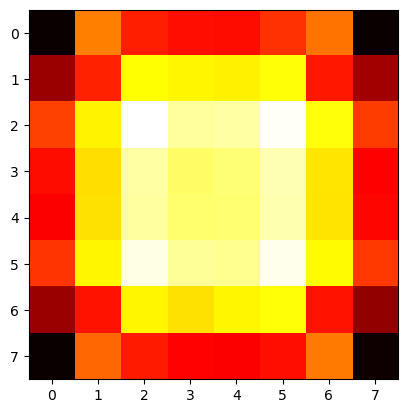

In [22]:
plt.imshow(statistical_board, cmap='hot', interpolation='nearest')
plt.show()

In [29]:
    euristical_board = np.array([[3, 5, 4, 4, 4, 4, 5, 2],
       [3, 4, 6, 6, 6, 6, 4, 3],
       [4, 6, 7, 7, 6, 7, 6, 4],
       [4, 6, 7, 6, 6, 7, 6, 4],
       [4, 5, 7, 6, 6, 6, 6, 4],
       [4, 5, 7, 6, 7, 7, 6, 5],
       [3, 4, 6, 6, 6, 6, 4, 4],
       [2, 5, 4, 4, 4, 4, 5, 2]])

In [2]:
help(move_horse)

Help on function move_horse in module __main__:

move_horse(board)
    Effettua una mossa del cavallo sulla scacchiera.
    
    Parametri:
    board (numpy.ndarray): Una matrice 8x8 che rappresenta la scacchiera, con i numeri che indicano le mosse del cavallo.
    
    Output:
    board (numpy.ndarray): La scacchiera aggiornata dopo la mossa del cavallo.
    status (str): Una stringa che indica lo stato del gioco: "Game Over" se non ci sono più mosse disponibili, 
                  "Keep Playing" se il gioco può continuare.
    
    Descrizione:
    La funzione calcola la mossa successiva del cavallo basandosi sulla sua posizione corrente. Se non ci sono mosse 
    disponibili, il gioco termina. Altrimenti, effettua una mossa casuale tra quelle disponibili e aggiorna la scacchiera.

